/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


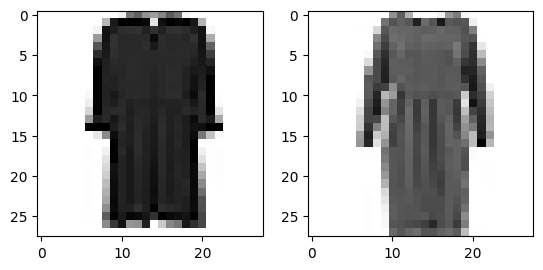

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Load the MNIST data
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
 

subsample_idc = np.random.choice(X.shape[0], 1000, replace=False)
X = X[subsample_idc,:]
y = y[subsample_idc]
 
# Show two example images
fig, ax = plt.subplots(1,2)
ax[0].imshow(X[11,:].reshape(28,28), 'Greys')
ax[1].imshow(X[15,:].reshape(28,28), 'Greys')

In [2]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
# We want to get TSNE embedding with 2 dimensions
n_components = 3
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result = tsne_result/np.abs(tsne_result).max()
tsne_result = np.array([tsne_result[i] for i in range(len(tsne_result)) if y[i]=='0' or y[i]=='1'])
y=np.array([v for v in y if v=='0' or v=='1'])
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'tsne_3': tsne_result[:,2], 'label': y})


In [3]:
tsne_result_df

,tsne_1,tsne_2,tsne_3,label
0,-0.238536,-0.790018,-0.061175,1
1,-0.064867,-0.770117,0.193083,1
2,0.245689,-0.126023,0.247300,0
3,-0.072062,-0.839834,0.198752,1
4,0.284930,-0.215836,0.192894,0
...,...,...,...,...
208,-0.262524,-0.552994,0.062283,1
209,0.277767,-0.509635,-0.136950,0
210,-0.130877,-0.604137,0.193967,1
211,-0.167911,-0.603494,-0.057641,1


In [4]:

d={'0':-1,'1':1}
train_x, train_y  = tsne_result[:75],[d[i] for i in y[:75]]
test_x, test_y  = tsne_result[75:150],[d[i] for i in y[75:150]]

In [5]:
import sys
sys.path.append("../")
from BinaryCliffordClassifier import *
from BinaryClassifier import *
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.quantum_info import Statevector

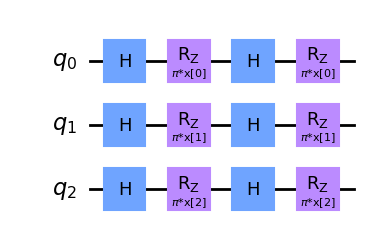

In [6]:
### Set up the encoder
X=ParameterVector('x',3)
encoder  = QuantumCircuit(3)
encoder.h([0,1,2])
encoder.rz(np.pi * X[0],0)
encoder.rz(np.pi * X[1],1)
encoder.rz(np.pi * X[2],2)
encoder=encoder.compose(encoder)
encoder.draw(output='mpl',fold=-1)

In [7]:
def getClassifier(layers=3):
    Classifier=QuantumCircuit(3)
    Theta = ParameterVector('θ', 6 * layers)
    for i in range(layers):
        Classifier.ry(Theta[6*i],0)
        Classifier.ry(Theta[6*i+1],1)
        Classifier.ry(Theta[6*i+2],2)
        Classifier.rz(Theta[6*i+3],0)
        Classifier.rz(Theta[6*i+4],1)
        Classifier.rz(Theta[6*i+5],2)
        if(i<layers-1):
            Classifier.cx(0,1)
            Classifier.cx(1,2)
            Classifier.cx(2,0)
    return Classifier
classifier = getClassifier(5)
classifier.draw()

┌──────────┐┌──────────┐          ┌───┐┌──────────┐ ┌──────────┐          »
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├──■───────┤ X ├┤ Ry(θ[6]) ├─┤ Rz(θ[9]) ├──■───────»
     ├──────────┤├──────────┤┌─┴─┐     └─┬─┘├──────────┤┌┴──────────┤┌─┴─┐     »
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├┤ X ├──■────┼──┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├┤ X ├──■──»
     ├──────────┤├──────────┤└───┘┌─┴─┐  │  ├──────────┤├───────────┤└───┘┌─┴─┐»
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[5]) ├─────┤ X ├──■──┤ Ry(θ[8]) ├┤ Rz(θ[11]) ├─────┤ X ├»
     └──────────┘└──────────┘     └───┘     └──────────┘└───────────┘     └───┘»
«     ┌───┐┌───────────┐┌───────────┐          ┌───┐┌───────────┐┌───────────┐»
«q_0: ┤ X ├┤ Ry(θ[12]) ├┤ Rz(θ[15]) ├──■───────┤ X ├┤ Ry(θ[18]) ├┤ Rz(θ[21]) ├»
«     └─┬─┘├───────────┤├───────────┤┌─┴─┐     └─┬─┘├───────────┤├───────────┤»
«q_1: ──┼──┤ Ry(θ[13]) ├┤ Rz(θ[16]) ├┤ X ├──■────┼──┤ Ry(θ[19]) ├┤ Rz(θ[22]) ├»
«       │  ├───────────┤├───────────┤└───┘┌─┴─┐  │  ├───────────┤├───────────┤»
«q_2: ──■──┤ Ry(θ[14]) ├┤ Rz(θ[17]) ├─────┤ X ├──■──┤ Ry(θ[20]) ├┤ Rz(θ[23]) ├»
«          └───────────┘└───────────┘     └───┘     └───────────┘└───────────┘»
«               ┌───┐┌───────────┐┌───────────┐
«q_0: ──■───────┤ X ├┤ Ry(θ[24]) ├┤ Rz(θ[27]) ├
«     ┌─┴─┐     └─┬─┘├───────────┤├───────────┤
«q_1: ┤ X ├──■────┼──┤ Ry(θ[25]) ├┤ Rz(θ[28]) ├
«     └───┘┌─┴─┐  │  ├───────────┤├───────────┤
«q_2: ─────┤ X ├──■──┤ Ry(θ[26]) ├┤ Rz(θ[29]) ├
«          └───┘     └───────────┘└───────────┘

In [8]:
val,params = VQC_optimize(train_x=train_x,train_y=train_y,classifier=classifier,encoder=encoder,iterations=100,save_dir="Log",name='FashionMNIST')
theta = np.array(params)*np.pi/2


In [9]:
accuracy(classifier,encoder,theta,train_x,test_x,train_y,test_y)

(0.9066666666666666, 0.8666666666666667)

In [10]:
exactLosses(classifier,encoder,theta,train_x,test_x,train_y,test_y)

(13.354083709367846, 48.104908154793776)